# Drills - Linear regression

## DRILL: Prepare the Data

by: Melissa N 

Prepare this data to model with multivariable regression (including data cleaning if necessary) according to this specification:     

__Propertycrime=α+Population+Population^2+Murder+Robbery__  

 
The 'population' variable is already set for you, but you will need to create the last three features. Robbery and Murder are currently continuous variables. For this model, please use these variables to create categorical features where values greater than 0 are coded 1, and values equal to 0 are coded 0. You'll use this data and model in a later assignment- for now, just write the code you need to get the data ready. Don't forget basic data cleaning procedures, either! Do some graphing to see if there are any anomalous cases, and decide how you want to deal with them.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
from IPython.display import display

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
# Assign spreadsheet filename to `file`
file = 'table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls'

# Load spreadsheet
xl = pd.ExcelFile(file)

# Print the sheet names
print(xl.sheet_names)

# Load a sheet into a DataFrame by name: df1
df1 = xl.parse('13tbl8ny')

display(df1.head())

['13tbl8ny']


,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2013",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3
4,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0


### Cleaning Data    

We will also look at rows or column that are empty and remove them from our data.   
we will look for outliers and remove them from our data.   

In [3]:
#Adjust df1 to exclude 1st 3 rows.
df = df1[3:len(df1)]

#grab the first row for the header set the header row as the df header

df.columns = df.iloc[0]

df = df[1:]


df.index = range(0,len(df))

In [4]:
display(df.head())

3,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0
1,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0
2,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0
3,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN
4,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN


In [5]:
df.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object', name=3)

In [6]:
# checking the last 3 rows 
(df[-3:])

3,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
348,1 The figures shown in this column for the off...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
349,2 The figures shown in this column for the off...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
350,3 The FBI does not publish arson data unless i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Removing the columns with NAN

df.drop(['Rape\n(revised\ndefinition)1','Arson3'], inplace=True, axis=1)


#Adjust df to exclude the last 3 rows
# dropping the row
df = df.iloc[:347]

In [8]:
#Property and Crime 
y = df['Property\ncrime']
#Population  
x1 = df['Population']
#Murder
x2 = df['Murder and\nnonnegligent\nmanslaughter']
#Robbery
x3 = df['Robbery']

In [9]:
# Check variable types.
df.dtypes

3
City                                      object
Population                                object
Violent\ncrime                            object
Murder and\nnonnegligent\nmanslaughter    object
Rape\n(legacy\ndefinition)2               object
Robbery                                   object
Aggravated\nassault                       object
Property\ncrime                           object
Burglary                                  object
Larceny-\ntheft                           object
Motor\nvehicle\ntheft                     object
dtype: object

In [10]:
# convert columns to numeric.
df.loc[:,'Property\ncrime'] = pd.to_numeric(df.loc[:,'Property\ncrime'])
df.loc[:,'Population'] = pd.to_numeric(df.loc[:,'Population'])

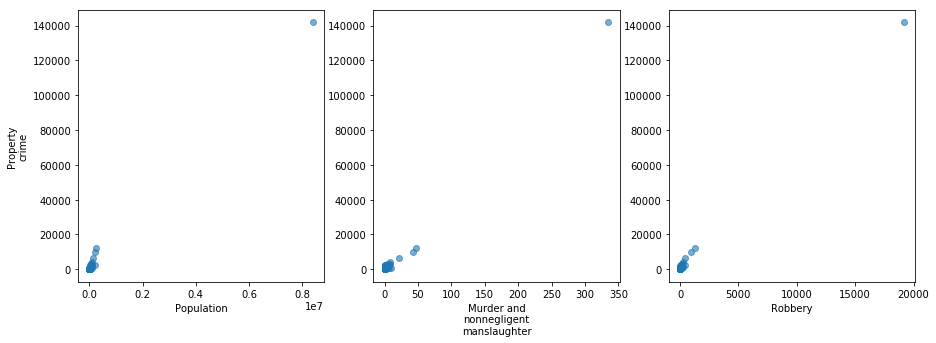

In [11]:
# Look at the scatter plot for Population, Murder and Robbery


plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(df['Population'], df['Property\ncrime'], alpha=0.6)
plt.xlabel('Population')
plt.ylabel('Property\ncrime')

plt.subplot(1, 3, 2)

plt.scatter(df['Murder and\nnonnegligent\nmanslaughter'], df['Property\ncrime'], alpha=0.6)
plt.xlabel('Murder and\nnonnegligent\nmanslaughter')

plt.subplot(1, 3, 3)


plt.scatter(df['Robbery'], df['Property\ncrime'], alpha=0.6)
plt.xlabel('Robbery')


plt.show()

Looking at this scatter plot, we can see that there is a lot of outliers. 
One of them occurs where Property and crime is 140,000. So we will try to remove that and other outliers that we may see. 

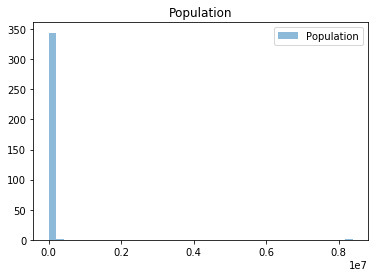

In [12]:

# Look at the histogram of populations"

plt.hist(df['Population'], label = 'Population', alpha = 0.5, bins = 40)
plt.title('Population')
plt.legend(loc='best')
plt.show()

This histogram doesn't tell us anything. 
Hopefully will be helpful or better once we have remove the outliers. 

In [13]:
## From our study we see that there is an outlier when Property and crime is bigger that 10,000 or 3,000
df[df['Property\ncrime'] > 3000]

3,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft
3,Albany,97956,791,8,30,227,526,4090,705,3243,142
35,Buffalo,258789,3249,47,145,1322,1735,12491,3458,8076,957
216,New York,8396126,52384,335,1112,19170,31767,141971,16606,117931,7434
272,Rochester,210562,2107,42,92,918,1055,10051,2587,6855,609
310,Syracuse,143834,1192,21,75,400,696,6473,1781,4298,394


In [14]:
## Drop the rows that seem to contain outliers for Property and crime 
df.drop(df.index[[3,35,216,272,310]], inplace=True, axis=0)

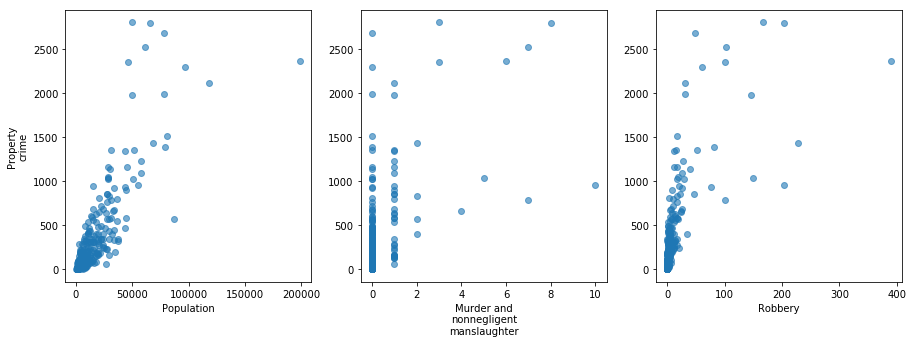

In [15]:
# Look at the scatter plot for Population, Murder and Robbery with cleaned data 

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(df['Population'], df['Property\ncrime'], alpha=0.6)
plt.xlabel('Population')
plt.ylabel('Property\ncrime')

plt.subplot(1, 3, 2)

plt.scatter(df['Murder and\nnonnegligent\nmanslaughter'], df['Property\ncrime'], alpha=0.6)
plt.xlabel('Murder and\nnonnegligent\nmanslaughter')

plt.subplot(1, 3, 3)


plt.scatter(df['Robbery'], df['Property\ncrime'], alpha=0.6)
plt.xlabel('Robbery')


plt.show()

The scatter plots looks better.     
We can clearly see that there is a lot of information for City with Property Crime less that 1000 and Population around 50,000.    
For Murder and nonnegligent manslaugther most of them are in place where there is 2 or less occurences.   
For Robbery it looks like most of them occure where there is a 50 or less occurences.   

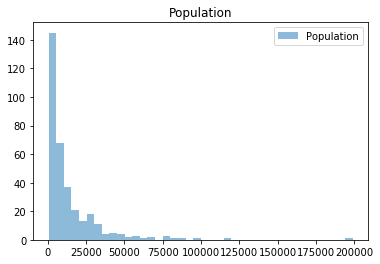

In [16]:
# Look at the histogram of population with clean data 

plt.hist(df['Population'], label = 'Population', alpha = 0.5, bins = 40)
plt.title('Population')
plt.legend(loc='best')
plt.show()

In [17]:
## From our study we see that there is an outlier when Property and crime is bigger that 10,000 or 3,000
df[df['Population'] > 100000]

3,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft
7,Amherst Town,118296,107,1,7,31,68,2118,204,1882,32
346,Yonkers,199134,1036,6,25,390,615,2368,470,1662,236


In [18]:
## Drop the rows that seem to contain outliers for Property and crime 
df.drop(df.index[[7]], inplace=True, axis=0)

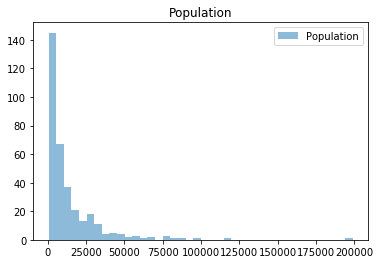

In [19]:
# Look at the histogram of population with clean data 

plt.hist(df['Population'], label = 'Population', alpha = 0.5, bins = 40)
plt.title('Population')
plt.legend(loc='best')
plt.show()

In [20]:
# Making dummies.
# Also creating a data frame to hold our features.


features = df
display(features.head())

3,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft
0,Adams Village,1861,0,0,0,0,0,12,2,10,0
1,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1
2,Akron Village,2846,3,0,0,0,3,16,1,15,0
4,Albion Village,6388,23,0,3,4,16,223,53,165,5
5,Alfred Village,4089,5,0,0,3,2,46,10,36,0


In [21]:
### Create the new feature, (Population)^2

features['Population_sqrd'] = df['Population'] **2

In [22]:
### Turn Continuous into categorical variable
### For this model, please use these variables to create categorical features
##where values greater than 0 are coded 1, and values equal to 0 are coded 0.

features['Robbery_cat'] = np.where(df['Robbery']>0, 1, 0)

# Check to make sure it worked.
print(df['Robbery'].groupby(features['Robbery_cat']).describe())

             count  unique  top  freq
Robbery_cat                          
0              139       1    0   139
1              202      45    1    56


In [23]:
### Turn Continuous into categorical variable
### For this model, please use these variables to create categorical features
##where values greater than 0 are coded 1, and values equal to 0 are coded 0.

features['Murder_cat'] = np.where(df['Murder and\nnonnegligent\nmanslaughter']>0, 1, 0)

# Check to make sure it worked.
print(df['Murder and\nnonnegligent\nmanslaughter'].groupby(features['Murder_cat']).describe())

            count  unique  top  freq
Murder_cat                          
0             297       1    0   297
1              44       9    1    31


In [24]:
# Take a subset of the data to make plots clearer.
## selecting the columns I want to work with, and assigning them to a new df called df_I.

df_f = features[['City', 'Property\ncrime','Population', 'Population_sqrd','Murder and\nnonnegligent\nmanslaughter',
                 'Murder_cat','Robbery','Robbery_cat']]

In [25]:
display(df_f.head())

3,City,Property crime,Population,Population_sqrd,Murder and nonnegligent manslaughter,Murder_cat,Robbery,Robbery_cat
0,Adams Village,12,1861,3463321,0,0,0,0
1,Addison Town and Village,24,2577,6640929,0,0,0,0
2,Akron Village,16,2846,8099716,0,0,0,0
4,Albion Village,223,6388,40806544,0,0,4,1
5,Alfred Village,46,4089,16719921,0,0,3,1
